Gaussian and Laplacian Pyramids

Decomposition and Reconsruction Analysis

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
# Defining Gaussian Kernel Function
# Gaussian_kernel_5x5 = (1.0/256)*np.array([[1, 4,  6,  4,  1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4,  6,  4,  1]])
gaussian_kernel_3x3 = (1.0/16)*np.array([[1, 2, 1],[2,4,2],[1,2,1]])

In [23]:
# Function for resize images having odd dimensions into even
def preprocess_odd_images(img):
    M, N = img.shape[:2]
    if M % 2 == 1 and N % 2 == 1:
        return img[1:][1:]
    elif M % 2 == 1:
        return img[1:][:]
    elif N % 2 == 1:
        return img[:][1:]
    else:
        return img

In [24]:
# Function to handle convolution of two images(matrices).
# Defining this as a general function helps us in making
# repeated calls to the function in future.
def convolve(f, g):  # g is thge filter
    vmax = f.shape[0]
    wmax = f.shape[1]
    smax = g.shape[0]
    tmax = g.shape[1]
    smid = smax // 2
    tmid = tmax // 2
    xmax = vmax + 2*smid
    ymax = wmax + 2*tmid
    # Allocate result image.
    h = np.zeros([xmax, ymax], dtype=f.dtype)
    # Do convolution
    for x in range(xmax):
        for y in range(ymax):
            # Calculate pixel value for h at (x,y). Sum one component
            # for each pixel (s, t) of the filter g.
            s_from = max(smid - x, -smid)
            s_to = min((xmax - x) - smid, smid + 1)
            t_from = max(tmid - y, -tmid)
            t_to = min((ymax - y) - tmid, tmid + 1)
            value = 0
            for s in range(s_from, s_to):
                for t in range(t_from, t_to):
                    v = x - smid + s
                    w = y - tmid + t
                    value += g[smid - s, tmid - t] * f[v, w]
            h[x, y] = value
    return h

In [25]:
# Function for upsampling of gaussian blur images.
def interpolate(image):
    image_up = np.zeros((2*image.shape[0], 2*image.shape[1]))
    image_up[::2, ::2] = image
    return convolve(image_up, 4*gaussian_kernel_3x3)

In [26]:
# Functions to plot our results
def plot_input(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

def sub_plot(img1, img2, img3, title):
    fig = plt.figure()
    plt.subplot(131)
    plt.imshow(img1, cmap = 'gray')
    plt.subplot(132)
    plt.imshow(img2, cmap = 'gray')
    plt.subplot(133)
    plt.imshow(img3, cmap = 'gray')
    plt.show()

In [27]:
# Often the convolved image is not of the same size as the input image. The following function takes care of the 
# appropriate padding to ensure images are of same size before addition or subtraction.
def handle_img_padding(img1, img2):
    M1, N1 = img1.shape[:2]
    M2, N2 = img2.shape[:2]
    padding_x = int(np.abs(M2 - M1)/2)
    padding_y = int(np.abs(N2 - N1)/2)
    # alters size of img2 according to size of img1
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y] 
    return img2

In [28]:
# Given two matrices as input, the following function computes the minimum squared error(MSE) of the two matrices.
def min_sqr_err(mat1, mat2):
    min_sq = 0
    M, N = mat1.shape[:2]
    for i in range(M):
        for j in range(N):
            min_sq += np.square(mat1[i][j] - mat2[i][j])
    return min_sq

In [29]:
# Function to perform Gaussian filtering on a given image. It convolves a given image with the Gaussian kernel 
# defined above and performs downsampling of the result.
def gaussian_pyramid(image):
    image_blur = convolve(image, gaussian_kernel_3x3)
    return image_blur[::2, ::2]

In [30]:
# Function to generate Gaussian and Laplacian pyramids using the method described above. Returns the generated
# Gaussian pyramid and Laplacian pyramid.
def create_gaussian_laplacian_pyramids(image, level):
    G = [image]
    L = []
    while level > 0:
        level -= 1
        image_blur = gaussian_pyramid(image)
        G.append(image_blur)
        expanded_img = interpolate(image_blur)
        if image.shape[:2] != expanded_img.shape[:2]:
            expanded_img = handle_img_padding(image, expanded_img)
        laplacian = image - expanded_img
        L.append(laplacian)
        image = image_blur
    return G, L

In [31]:
# Function to reconstruct original image using the computed Gaussian and Laplacian filters. 
# The function follows the steps described above for reconstruction of the image.
def reconstruct_original_img(G, L):
    reconstructed_images = []
    for i in range(len(G)-1 , 0, -1):
        expanded_img = interpolate(G[i])
        if expanded_img.shape[:2]!= L[i-1].shape[:2]:
            resized_img = handle_img_padding(L[i-1], expanded_img)
        reconstructed_images.append(resized_img + L[i-1])
        sub_plot(expanded_img, L[i-1], resized_img + L[i-1], "Levels" + str(i))
    return reconstructed_images

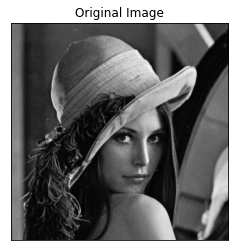

In [32]:
original_img = cv2.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab1\lenna.jpg', 0)
original_img = preprocess_odd_images(original_img)
plot_input(original_img, 'Original Image')

In [33]:
M, N = original_img.shape[:2]
print(f"Dimensions of given image are: {M, N}")

Dimensions of given image are: (512, 512)


In [34]:
pyramid_levels = 6

In [35]:
# Generating Gaussian and Laplacian Pyramids
gaussian_pyramid, laplacian_pyramid = create_gaussian_laplacian_pyramids(original_img, pyramid_levels)

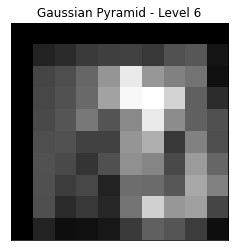

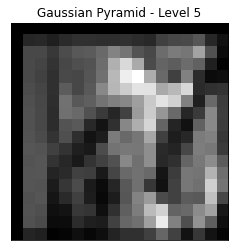

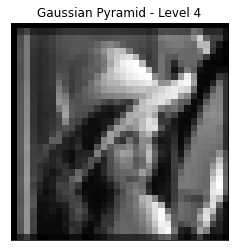

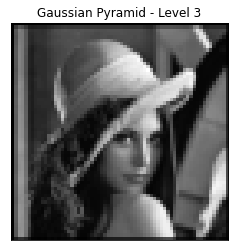

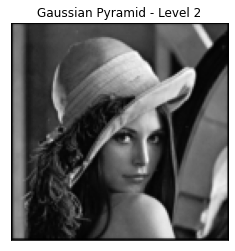

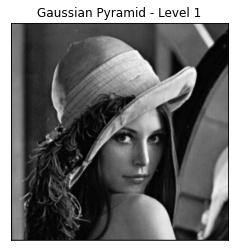

In [37]:
#Visualizing Gaussian Pyramid
for i in range(len(gaussian_pyramid)-1, 0, -1):
    plot_input(gaussian_pyramid[i], 'Gaussian Pyramid - Level '+ str(i))
    

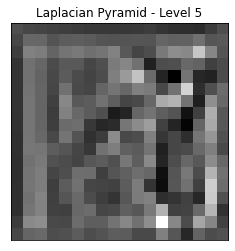

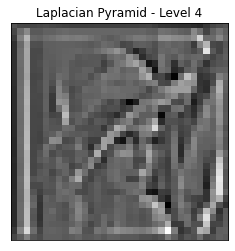

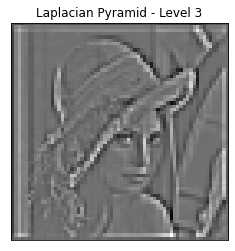

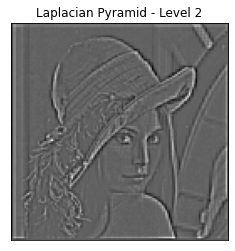

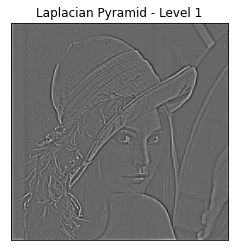

In [17]:
#Visualizing Laplacian Pyramid
for i in range(len(laplacian_pyramid)-1, 0, -1):
    plot_input(laplacian_pyramid[i], 'Laplacian Pyramid - Level '+ str(i))

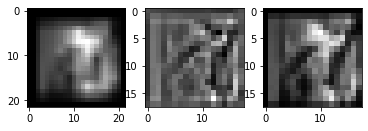

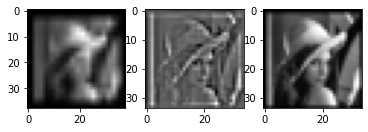

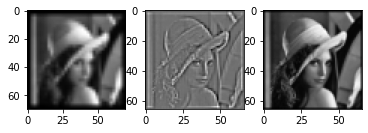

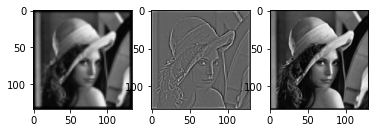

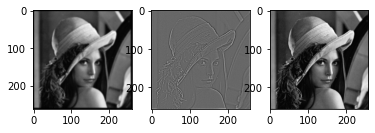

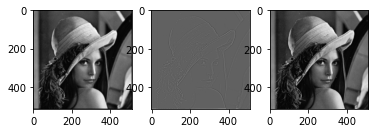

In [18]:
# reconstructing image from the blur image and laplacian Pyramid
reconstructed_images = reconstruct_original_img(gaussian_pyramid, laplacian_pyramid)

#At each step, we can verify that:
Gaussian_Pyramid[i] + Laplacian_Pyramid[i] = Gaussian_Pyramid[i-1] 

Finally, we have Gaussian_Pyramid[0], which infact is the original image.

In [19]:
# MSE Computation ( between the original and the reconstructed images)
final_image = reconstructed_images[-1]
print(f"Minimum Squared Error (MSE) : {min_sqr_err(original_img, final_image)}")

Minimum Squared Error (MSE) : 0.0


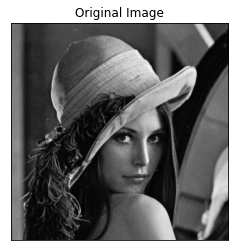

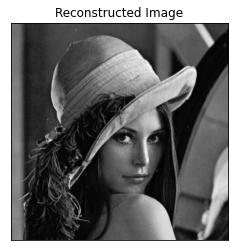

In [20]:
# plotting the original and reconstructed images
plot_input(original_img, 'Original Image')
plot_input(final_image, 'Reconstructed Image')

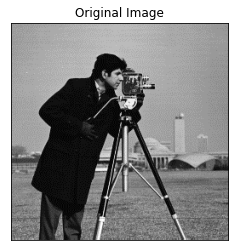

In [12]:
original_img = cv2.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab1\cameraman.png', 0)
original_img = preprocess_odd_images(original_img)
plot_input(original_img, 'Original Image')

In [13]:
M, N = original_img.shape[:2]
print(f"Dimensions of given image are: {M, N}")

Dimensions of given image are: (256, 256)


In [14]:
pyramid_levels = 6

In [15]:
# Generating Gaussian and Laplacian Pyramids
gaussian_pyramid, laplacian_pyramid = create_gaussian_laplacian_pyramids(original_img, pyramid_levels)

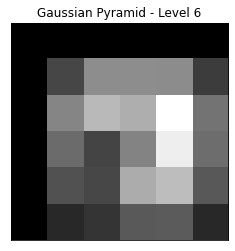

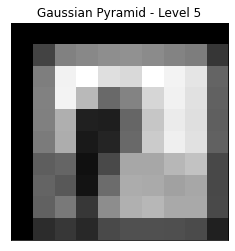

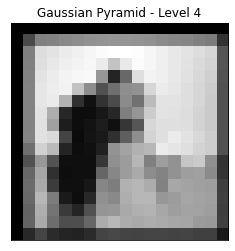

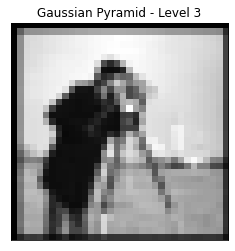

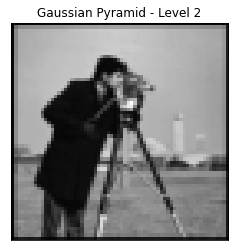

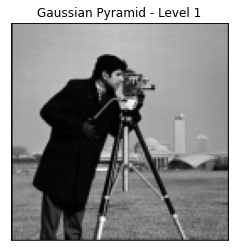

In [16]:
#Visualizing Gaussian Pyramid
for i in range(len(gaussian_pyramid)-1, 0, -1):
    plot_input(gaussian_pyramid[i], 'Gaussian Pyramid - Level '+ str(i))

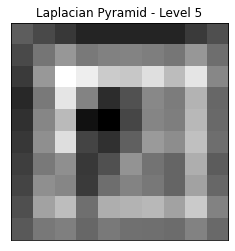

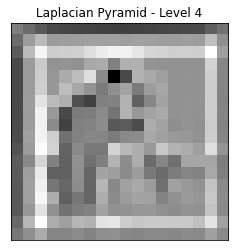

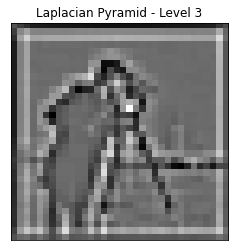

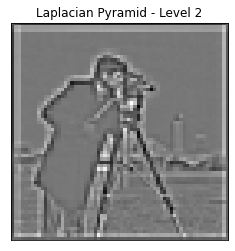

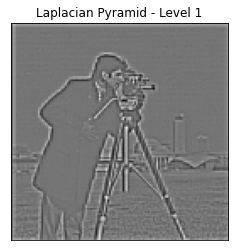

In [17]:
#Visualizing Laplacian Pyramid
for i in range(len(laplacian_pyramid)-1, 0, -1):
    plot_input(laplacian_pyramid[i], 'Laplacian Pyramid - Level '+ str(i))

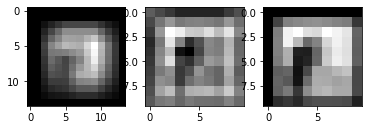

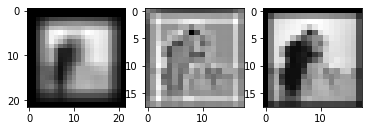

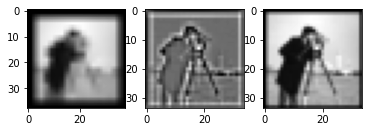

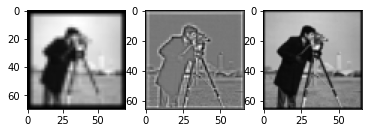

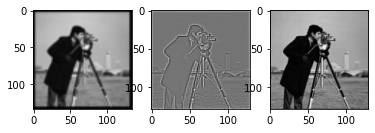

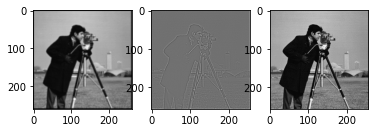

In [18]:
# reconstructing image from the blur image and laplacian Pyramid
reconstructed_images = reconstruct_original_img(gaussian_pyramid, laplacian_pyramid)

In [19]:
# MSE Computation ( between the original and the reconstructed images)
final_image = reconstructed_images[-1]
print(f"Minimum Squared Error (MSE) : {min_sqr_err(original_img, final_image)}")

Minimum Squared Error (MSE) : 0.0


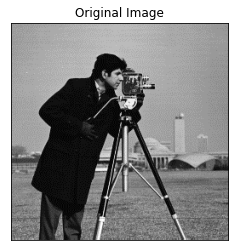

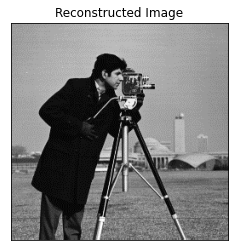

In [20]:
# plotting the original and reconstructed images
plot_input(original_img, 'Original Image')
plot_input(final_image, 'Reconstructed Image')

Conclusion :

The reconstructed image is infact the original image, as verified by the value of MSE, which is 0. The MSE is 0, because at every level, where Gaussian pyramid(low pass filter) removes the high frequencies, the Laplacian pyramid stores just these high frequencies in the image. Once we have a blurred image at any level in the Gaussian pyramid, and the corresponding Laplacian pyramid, we can reconstruct the original image by successive addition of higher frequency components at different levels. Due to this property of the Laplacian pyramids, it is used for Image Compression.

